# Установка зависимостей

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from matplotlib import pyplot as plt
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import datetime
from catboost import CatBoostClassifier
from catboost import Pool
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.stem import WordNetLemmatizer
from catboost.text_processing import Tokenizer

In [2]:
TRESHOLD_COUNT = 30
TRESHOLD_DELTA = 0.05
y_name = 'has_next_round'
random_state = 1703
pd.set_option('display.max_columns', None)

# EDA

In [3]:
df = pd.read_csv('startup_train.csv').drop('index', axis=1)
df_test = pd.read_csv('startup_test.csv').drop('index', axis=1)

df_concat = pd.concat([df, df_test]).reset_index().drop(['index'], axis=1)
df_onlynum = df.drop(['name', 'overview', 'category_code', 'tag_list', 'country_code'], axis=1)
df_onlynum_test = df_test.drop(['name', 'overview', 'category_code', 'tag_list', 'country_code'], axis=1)

df

,name,overview,category_code,tag_list,country_code,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round
0,Stackdriver,Stackdriver provides a [powerfully simple moni...,enterprise,"application-management, cloud-monitoring, moni...",USA,1,1,15.424948,1,0,0.024390,0.182927,1
1,Authix Tecnologies,Authix Tecnologies is a Torino based start-up ...,security,authentication-solution,GRC,1,1,13.340052,1,0,0.000000,0.000000,1
2,Lytics,Lytics provides B2C marketers the first analyt...,software,"analytics, big-data, data-science, bigdata",USA,2,1,14.603968,5,0,0.021505,0.242105,0
3,1World Online,1World Online is a Silicon Valley-based startu...,enterprise,"social-research, big-data, analytics, mobile",USA,1,1,13.815511,1,0,0.000000,0.000000,0
4,Enure Networks,"Enure Networks, Ltd. provides home-network man...",software,NaN,ISR,1,1,15.894952,2,0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,ice,Ice.com is one of the leading e-commerce websi...,ecommerce,"jewelry, ecommerce",USA,1,1,17.665658,1,0,0.000000,0.013889,0
5508,Course Hero,Course Hero is a digital learning platform tha...,education,"social-learning-network, online-courses, onlin...",USA,2,1,14.220976,6,0,0.010811,0.128342,0
5509,DVS Sciences,"DVS Sciences, Inc. manufactures and has global...",manufacturing,NaN,USA,1,1,16.496532,3,0,0.000000,0.106667,0
5510,KAYAK,KAYAK is a travel search engine. It indexes h...,search,"travel, travelsearch, airfare",USA,1,1,15.955577,2,0,0.333333,0.000000,1


In [4]:
df.describe()

,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,1.404572,0.915276,13.779182,2.121916,0.068396,0.006196,0.057817,0.485123
std,0.753845,0.278496,4.301645,2.455116,0.252448,0.028497,0.090860,0.499824
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,14.220976,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,14.914123,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,15.607270,3.000000,0.000000,0.000000,0.103448,1.000000
max,13.000000,1.000000,19.328939,32.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Получение серии логических значений
bool_series = df['ln_raised_amount'] == 0

# Фильтрация только True значений
true_values = bool_series[bool_series]

true_values

32      True
41      True
66      True
79      True
101     True
        ... 
5403    True
5428    True
5485    True
5489    True
5494    True
Name: ln_raised_amount, Length: 467, dtype: bool

Первым делом надо посмотреть - сколько пропусков в датасете. Это позволяет понять, как нам надо предобрабатывать данные и в целом взаимодействовать с ними. Как мы видим - пропусков в целом не много, однако часто пропущены тэги. В дальнекйшем нам это пригодиться.

In [6]:
df.isna().sum()

name                                  0
overview                              2
category_code                         0
tag_list                           2193
country_code                          0
num_prev_rounds                       0
has_raised_amount                     0
ln_raised_amount                      0
participants                          0
previous_any_founder_experience       0
ipo_prob                              0
ma_prob                               0
has_next_round                        0
dtype: int64

In [7]:
df_test.isna().sum()

name                                 0
overview                             1
category_code                        0
tag_list                           535
country_code                         0
num_prev_rounds                      0
has_raised_amount                    0
ln_raised_amount                     0
participants                         0
previous_any_founder_experience      0
ipo_prob                             0
ma_prob                              0
dtype: int64

In [8]:
tags_null = df['tag_list']
tags_null.to_csv("tags_null.csv", index=False)

In [9]:
tags_null = df['overview']
tags_null.to_csv("overview.csv", index=False)

In [10]:
mean_round = df.has_next_round.mean()
print('Mean in the world:', mean_round)

Mean in the world: 0.4851233671988389


# Визуализация

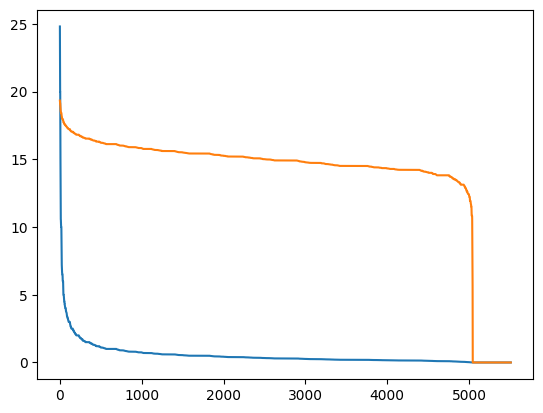

In [11]:
money = df['ln_raised_amount'].sort_values(ascending=False).reset_index().drop('index', axis=1).values.flatten()
plt.plot(np.exp(money)*1e-7)
plt.plot(money)

Добавим чуток фичей


In [12]:
df_extended = df_onlynum.copy()
df_extended['count'] = df.tag_list.str.count(',') + 1
df_extended['count'][df.tag_list.isna()] = 0
df_extended['no_count'] = df['tag_list'].isna()

df_extended['no_money'] = df['ln_raised_amount'] == 0
df_extended['many_money'] = df['ln_raised_amount'] > money[5000]
df_extended['realy_a_lot_of_money'] = df['ln_raised_amount'] > money[5300]
df_extended['little_money'] = df['ln_raised_amount'] < money[1000]
df_extended['too_little_money'] = df['ln_raised_amount'] < money[750]

df_extended['overview_length'] = df.overview.str.count(' ') + 1
df_extended['overview_length'][df.overview.isna()] = 0
df_extended['small_length'] = df_extended['overview_length'] < 20
df_extended['large_length'] = df_extended['overview_length'] > 200
df_extended['too_large_length'] = df_extended['overview_length'] > 300

df_extended['ln_raised_amount/participants'] = df_extended['ln_raised_amount']/(df_extended['participants'] + 1)

df_extended['no_invest'] = df['participants'] == 0
df_extended['len'] = df.name.str.len()
df_extended['tooshort'] = df_extended['len'] <= 2
df_extended['short'] = df_extended['len'] <= 5
df_extended['numinname'] = df['name'].str.extract('(\d+)').isna()
df_extended['large'] = df_extended['len'] >= 10
df_extended['toolarge'] = df_extended['len'] >= 25

df_extended

C:\Users\User345\AppData\Local\Temp\ipykernel_21136\566101919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended['count'][df.tag_list.isna()] = 0
C:\Users\User345\AppData\Local\Temp\ipykernel_21136\566101919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended['overview_length'][df.overview.isna()] = 0


,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round,count,no_count,no_money,many_money,realy_a_lot_of_money,little_money,too_little_money,overview_length,small_length,large_length,too_large_length,ln_raised_amount/participants,no_invest,len,tooshort,short,numinname,large,toolarge
0,1,1,15.424948,1,0,0.024390,0.182927,1,4.0,False,False,True,True,True,True,158.0,False,False,False,7.712474,False,11,False,False,True,True,False
1,1,1,13.340052,1,0,0.000000,0.000000,1,1.0,False,False,True,True,True,True,176.0,False,False,False,6.670026,False,18,False,False,True,True,False
2,2,1,14.603968,5,0,0.021505,0.242105,0,4.0,False,False,True,True,True,True,26.0,False,False,False,2.433995,False,6,False,False,True,False,False
3,1,1,13.815511,1,0,0.000000,0.000000,0,4.0,False,False,True,True,True,True,66.0,False,False,False,6.907755,False,13,False,False,False,True,False
4,1,1,15.894952,2,0,0.000000,0.000000,1,0.0,True,False,True,True,False,True,146.0,False,False,False,5.298317,False,14,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,1,1,17.665658,1,0,0.000000,0.013889,0,2.0,False,False,True,True,False,False,50.0,False,False,False,8.832829,False,3,False,True,True,False,False
5508,2,1,14.220976,6,0,0.010811,0.128342,0,9.0,False,False,True,True,True,True,54.0,False,False,False,2.031568,False,11,False,False,True,True,False
5509,1,1,16.496532,3,0,0.000000,0.106667,0,0.0,True,False,True,True,False,False,90.0,False,False,False,4.124133,False,12,False,False,True,True,False
5510,1,1,15.955577,2,0,0.333333,0.000000,1,3.0,False,False,True,True,False,True,222.0,False,True,False,5.318526,False,5,False,True,True,False,False


In [13]:
df_extended_test = df_onlynum_test.copy()
df_extended_test['count'] = df_test.tag_list.str.count(',') + 1
df_extended_test['count'][df_test.tag_list.isna()] = 0
df_extended_test['no_count'] = df_test['tag_list'].isna()

df_extended_test['no_money'] = df_test['ln_raised_amount'] == 0
df_extended_test['many_money'] = df_test['ln_raised_amount'] > money[5000]
df_extended_test['realy_a_lot_of_money'] = df_test['ln_raised_amount'] > money[5300]
df_extended_test['little_money'] = df_test['ln_raised_amount'] < money[1000]
df_extended_test['little_money'] = df_test['ln_raised_amount'] < money[1000]
df_extended_test['too_little_money'] = df_test['ln_raised_amount'] < money[750]

df_extended_test['overview_length'] = df_test.overview.str.count(' ') + 1
df_extended_test['overview_length'][df_test.overview.isna()] = 0
df_extended_test['small_length'] = df_extended_test['overview_length'] < 20
df_extended_test['large_length'] = df_extended_test['overview_length'] > 200
df_extended_test['too_large_length'] = df_extended_test['overview_length'] > 300

df_extended_test['ln_raised_amount/participants'] = df_extended_test['ln_raised_amount']/(df_extended_test['participants'] + 1)

df_extended_test['no_invest'] = df_test['participants'] == 0
df_extended_test['len'] = df_test.name.str.len()
df_extended_test['tooshort'] = df_extended_test['len'] <= 2
df_extended_test['short'] = df_extended_test['len'] <= 5
df_extended_test['numinname'] = df_test['name'].str.extract('(\d+)').isna()
df_extended_test['large'] = df_extended_test['len'] >= 10
df_extended_test['toolarge'] = df_extended_test['len'] >= 25

C:\Users\User345\AppData\Local\Temp\ipykernel_21136\3153584212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended_test['count'][df_test.tag_list.isna()] = 0
C:\Users\User345\AppData\Local\Temp\ipykernel_21136\3153584212.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extended_test['overview_length'][df_test.overview.isna()] = 0


In [14]:
countries_count_train = df.country_code.nunique()
cats_count_train = df.category_code.nunique()

print('country_code uniqie values:', countries_count_train, df_concat.country_code.nunique(), sep='\t')
print('category_code uniqie values:', cats_count_train, df_concat.category_code.nunique(), sep='\t')

country_code uniqie values:	69	76
category_code uniqie values:	41	41


USA     0.541	0.0555	 3929
ISR     0.422	0.0631	 109
CAN     0.416	0.0695	 166
SWE     0.386	0.0988	 44
JPN     0.367	0.118	 30
GBR     0.365	0.121	 288
DEU     0.36	0.125	 125
FRA     0.336	0.149	 143
BRA     0.333	0.152	 36
SGP     0.333	0.152	 39
IND     0.329	0.156	 82
ESP     0.306	0.179	 49
IRL     0.27	0.215	 37
RUS     0.25	0.235	 48


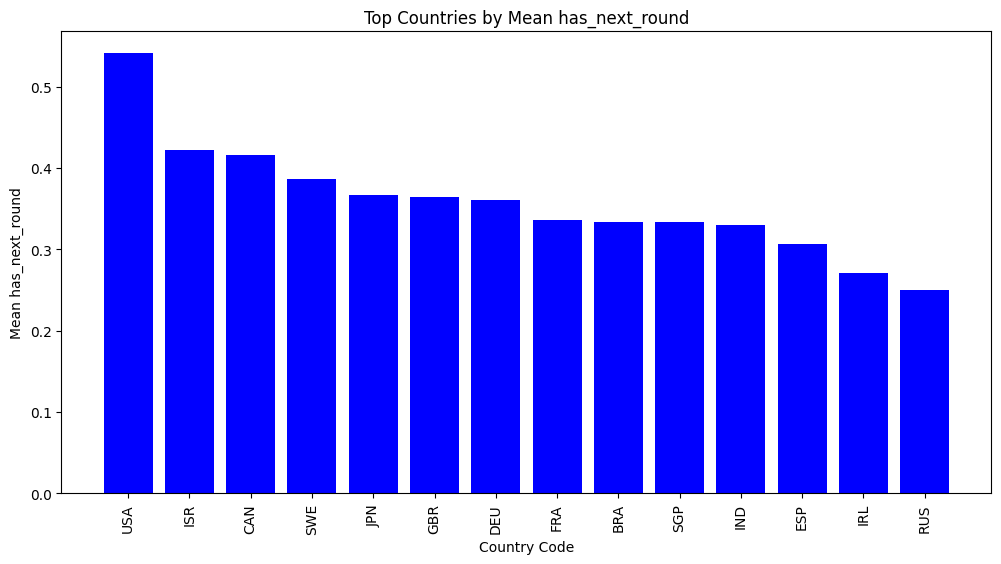


total: 5125, 93.0% of all train dataset
20.3% of countries


In [15]:
top_countries = df.groupby('country_code').has_next_round.mean().sort_values(ascending=False)
top_countries_name = top_countries.index

countries = []
count_countries = 0
for i, name in zip(top_countries, top_countries_name):
    length = df[df.country_code == name].shape[0]
    delta = abs(mean_round - i)

    if length < TRESHOLD_COUNT or delta < TRESHOLD_DELTA: continue
    count_countries += length
    countries.append(name)

    print(f'{name:7} {i:.03}\t{delta:.03}\t {length}')

values = [top_countries[country] for country in countries]

# Строим гистограмму
plt.figure(figsize=(12, 6))
plt.bar(countries, values, color='blue')
plt.xlabel('Country Code')
plt.ylabel('Mean has_next_round')
plt.title('Top Countries by Mean has_next_round')
plt.xticks(rotation=90)  # Поворачиваем подписи стран для лучшей читаемости
plt.show()

print(f'\ntotal: {count_countries}, {count_countries/df.shape[0]*100:.3}% of all train dataset')
print(f'{len(countries)/countries_count_train*100:.3}% of countries')

In [16]:
top_cat = df.groupby('category_code').has_next_round.mean().sort_values(ascending=False)
top_cat_name = top_cat.index

cats = []
count_cats = 0
for i, name in zip(top_cat, top_cat_name):
    length = df[df.category_code == name].shape[0]
    delta = abs(mean_round - i)

    if length < TRESHOLD_COUNT or delta < TRESHOLD_DELTA: continue
    count_cats += length
    cats.append(name)

    print(f'{name:20} {i:.03}\t {length}')

print(f'\ntotal: {count_cats}, {count_cats/df.shape[0]*100:.3}% of all train dataset')
print(f'{len(cats)/cats_count_train*100:.3}% of categories')

semiconductor        0.671	 70
cleantech            0.595	 148
biotech              0.586	 374
enterprise           0.584	 459
news                 0.575	 40
medical              0.575	 80
advertising          0.567	 358
messaging            0.543	 46
security             0.537	 95
search               0.422	 90
health               0.409	 66
web                  0.409	 560
network_hosting      0.406	 96
ecommerce            0.406	 308
public_relations     0.356	 45
consulting           0.333	 36
fashion              0.315	 54
other                0.284	 67

total: 2992, 54.3% of all train dataset
43.9% of categories


In [17]:
# # Группировка данных по обоим признакам
# grouped_data = df.groupby(['is_tag_list_filled', 'has_next_round']).size().unstack(fill_value=0)

# # Построение круговой диаграммы
# fig, ax = plt.subplots()
# grouped_data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, subplots=True, legend=False)

# # Настройка отображения
# ax.set_ylabel('')
# ax.legend(title='has_next_round', loc='upper left', bbox_to_anchor=(1, 1))
# plt.title('Зависимость has_next_round от is_tag_list_filled')
# plt.show()

<Axes: >

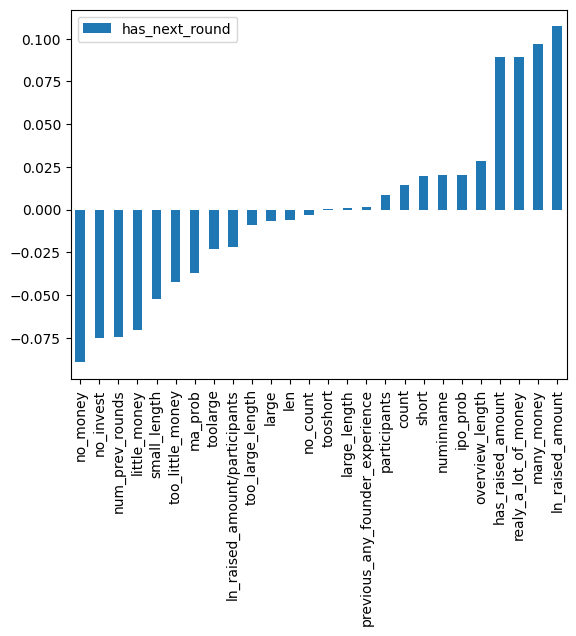

In [18]:
df_extended.corr()[['has_next_round']].drop('has_next_round').sort_values(by='has_next_round').plot.bar()

<Axes: >

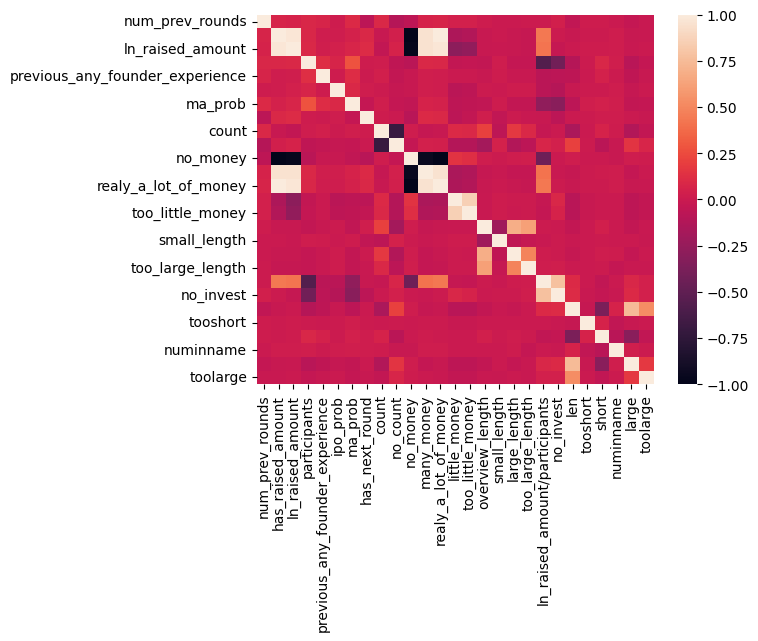

In [19]:
sns.heatmap(df_extended.corr())

In [20]:
ohe_df = df_extended.copy()
ohe_df_test = df_extended_test.copy()


for country in countries:
    ohe_df[country] = df['country_code'] == country
    ohe_df_test[country] = df_test['country_code'] == country


for cat in cats:
    ohe_df[cat] = df['category_code'] == cat
    ohe_df_test[cat] = df_test['category_code'] == cat

ohe_df

,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round,count,no_count,no_money,many_money,realy_a_lot_of_money,little_money,too_little_money,overview_length,small_length,large_length,too_large_length,ln_raised_amount/participants,no_invest,len,tooshort,short,numinname,large,toolarge,USA,ISR,CAN,SWE,JPN,GBR,DEU,FRA,BRA,SGP,IND,ESP,IRL,RUS,semiconductor,cleantech,biotech,enterprise,news,medical,advertising,messaging,security,search,health,web,network_hosting,ecommerce,public_relations,consulting,fashion,other
0,1,1,15.424948,1,0,0.024390,0.182927,1,4.0,False,False,True,True,True,True,158.0,False,False,False,7.712474,False,11,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1,13.340052,1,0,0.000000,0.000000,1,1.0,False,False,True,True,True,True,176.0,False,False,False,6.670026,False,18,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,2,1,14.603968,5,0,0.021505,0.242105,0,4.0,False,False,True,True,True,True,26.0,False,False,False,2.433995,False,6,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,1,13.815511,1,0,0.000000,0.000000,0,4.0,False,False,True,True,True,True,66.0,False,False,False,6.907755,False,13,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,1,15.894952,2,0,0.000000,0.000000,1,0.0,True,False,True,True,False,True,146.0,False,False,False,5.298317,False,14,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,1,1,17.665658,1,0,0.000000,0.013889,0,2.0,False,False,True,True,False,False,50.0,False,False,False,8.832829,False,3,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5508,2,1,14.220976,6,0,0.010811,0.128342,0,9.0,False,False,True,True,True,True,54.0,False,False,False,2.031568,False,11,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5509,1,1,16.496532,3,0,0.000000,0.106667,0,0.0,True,False,True,True,False,False,90.0,False,False,False,4.124133,False,12,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5510,1,1,15.955577,2,0,0.333333,0.000000,1,3.0,False,False,True,True,False,True,222.0,False,True,False,5.318526,False,5,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [21]:
ohe_df_temp =ohe_df.copy()

grouped_data = ohe_df_temp.groupby('has_next_round').sum()

grouped_data

,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,count,no_count,no_money,many_money,realy_a_lot_of_money,little_money,too_little_money,overview_length,small_length,large_length,too_large_length,ln_raised_amount/participants,no_invest,len,tooshort,short,numinname,large,toolarge,USA,ISR,CAN,SWE,JPN,GBR,DEU,FRA,BRA,SGP,IND,ESP,IRL,RUS,semiconductor,cleantech,biotech,enterprise,news,medical,advertising,messaging,security,search,health,web,network_hosting,ecommerce,public_relations,consulting,fashion,other
has_next_round,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4141,2529,37835.870338,5964,193,16.015193,173.350881,10324.0,1133,309,2497,2529,2397,2480,282502.0,127,221,58,18504.427211,627,30496,1,266,2748,1318,77,1805,63,97,27,19,183,80,95,24,26,55,34,27,36,23,60,155,191,17,34,155,21,44,52,39,331,57,183,29,24,37,48
1,3601,2516,38114.981685,5732,184,18.138899,145.335708,10060.0,1060,158,2503,2516,2113,2258,278380.0,68,210,48,16914.257739,432,28559,1,282,2607,1224,54,2124,46,69,17,11,105,45,48,12,13,27,15,10,12,47,88,219,268,23,46,203,25,51,38,27,229,39,125,16,12,17,19


In [22]:
# # Создаем подграфики для каждого признака
# fig, axes = plt.subplots(nrows=len(grouped_data.columns), ncols=1, figsize=(10, 5*len(grouped_data.columns)))

# # Определяем количество строк и столбцов для подграфиков
# num_features = len(grouped_data.columns)
# num_cols = 4  # Количество столбцов
# num_rows = (num_features + num_cols - 1) // num_cols  # Количество строк

# # Создаем подграфики для каждого признака
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# for i, feature in enumerate(grouped_data.columns):
#     # Данные для текущего признака
#     data = grouped_data[feature]
    
#     # Определяем позицию текущего подграфика
#     row = i // num_cols
#     col = i % num_cols
    
#     # Строим круговую диаграмму
#     axes[row, col].pie(data, labels=['No Next Round', 'Has Next Round'], autopct='%1.1f%%', startangle=90)
#     axes[row, col].set_title(f'Distribution of {feature} by has_next_round')

# # Удаляем пустые подграфики, если количество признаков не делится на количество столбцов
# if num_features % num_cols != 0:
#     for i in range(num_features, num_rows * num_cols):
#         row = i // num_cols
#         col = i % num_cols
#         fig.delaxes(axes[row, col])

# # Автоматически подстраивает параметры для лучшего отображения
# plt.show()

In [23]:
# # Создаем копию DataFrame
# ohe_df_temp = ohe_df.copy()

# # Вычисляем корреляцию с целевой переменной 'has_next_round'
# correlation_with_target = ohe_df_temp.corr()[['has_next_round']].drop('has_next_round').sort_values(by='has_next_round')

# # Добавляем абсолютное значение корреляции
# correlation_with_target['abs'] = correlation_with_target['has_next_round'].abs()

# # Визуализация корреляции
# correlation_with_target.plot.bar(figsize=(12,5))
# plt.title('Корреляция с целевой переменной "has_next_round"')
# plt.xlabel('Признаки')
# plt.ylabel('Корреляция')
# plt.show()

# # Тест на шум: признаки с корреляцией близкой к 0 можно считать шумом
# threshold = 0.05  # Пороговое значение для определения шума
# noisy_features = correlation_with_target[correlation_with_target['abs'] < threshold].index.tolist()

# print(f"Признаки, которые можно считать шумом (корреляция < {threshold}):")
# print(noisy_features)

# Обработка

In [24]:
tags = set()
for local_tags in df_concat.tag_list.str.split(', ').dropna().tolist():
    for tag in local_tags:
        tags.add(tag)

print('Tags count:', len(tags))

Tags count: 11091


In [25]:
df

,name,overview,category_code,tag_list,country_code,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round
0,Stackdriver,Stackdriver provides a [powerfully simple moni...,enterprise,"application-management, cloud-monitoring, moni...",USA,1,1,15.424948,1,0,0.024390,0.182927,1
1,Authix Tecnologies,Authix Tecnologies is a Torino based start-up ...,security,authentication-solution,GRC,1,1,13.340052,1,0,0.000000,0.000000,1
2,Lytics,Lytics provides B2C marketers the first analyt...,software,"analytics, big-data, data-science, bigdata",USA,2,1,14.603968,5,0,0.021505,0.242105,0
3,1World Online,1World Online is a Silicon Valley-based startu...,enterprise,"social-research, big-data, analytics, mobile",USA,1,1,13.815511,1,0,0.000000,0.000000,0
4,Enure Networks,"Enure Networks, Ltd. provides home-network man...",software,NaN,ISR,1,1,15.894952,2,0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,ice,Ice.com is one of the leading e-commerce websi...,ecommerce,"jewelry, ecommerce",USA,1,1,17.665658,1,0,0.000000,0.013889,0
5508,Course Hero,Course Hero is a digital learning platform tha...,education,"social-learning-network, online-courses, onlin...",USA,2,1,14.220976,6,0,0.010811,0.128342,0
5509,DVS Sciences,"DVS Sciences, Inc. manufactures and has global...",manufacturing,NaN,USA,1,1,16.496532,3,0,0.000000,0.106667,0
5510,KAYAK,KAYAK is a travel search engine. It indexes h...,search,"travel, travelsearch, airfare",USA,1,1,15.955577,2,0,0.333333,0.000000,1


In [26]:
# df['count'] = df_extended['count'].astype('int')
# df['no_count'] = df_extended['no_count']

# df_test['count'] = df_extended_test['count'].astype('int')
# df_test['no_count'] = df_extended_test['no_count']

# df['no_money'] = df_extended['no_money']
# df['many_money'] = df_extended['many_money'] 
# df['realy_a_lot_of_money'] = df_extended['realy_a_lot_of_money']
# df['little_money'] = df_extended['little_money']
# df['too_little_money'] = df_extended['too_little_money']
# df

# df_test['no_money'] = df_extended_test['no_money']
# df_test['many_money'] = df_extended_test['many_money'] 
# df_test['realy_a_lot_of_money'] = df_extended_test['realy_a_lot_of_money']
# df_test['little_money'] = df_extended_test['little_money']
# df_test['too_little_money'] = df_extended_test['too_little_money']
# df
df['len'] = df_extended['len']

df_test['len'] = df_extended_test['len']

# # Создание нового признака is_tag_list_filled
# df['is_tag_list_filled'] = df['tag_list'].isna()
# # Инвертирование значений в столбце is_tag_list_filled
# df['is_tag_list_filled'] = df['is_tag_list_filled'].apply(lambda x: not x)

# df_test['is_tag_list_filled'] = df_test['tag_list'].isna()
# # Инвертирование значений в столбце is_tag_list_filled
# df_test['is_tag_list_filled'] = df_test['is_tag_list_filled'].apply(lambda x: not x)

df

,name,overview,category_code,tag_list,country_code,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round,len
0,Stackdriver,Stackdriver provides a [powerfully simple moni...,enterprise,"application-management, cloud-monitoring, moni...",USA,1,1,15.424948,1,0,0.024390,0.182927,1,11
1,Authix Tecnologies,Authix Tecnologies is a Torino based start-up ...,security,authentication-solution,GRC,1,1,13.340052,1,0,0.000000,0.000000,1,18
2,Lytics,Lytics provides B2C marketers the first analyt...,software,"analytics, big-data, data-science, bigdata",USA,2,1,14.603968,5,0,0.021505,0.242105,0,6
3,1World Online,1World Online is a Silicon Valley-based startu...,enterprise,"social-research, big-data, analytics, mobile",USA,1,1,13.815511,1,0,0.000000,0.000000,0,13
4,Enure Networks,"Enure Networks, Ltd. provides home-network man...",software,NaN,ISR,1,1,15.894952,2,0,0.000000,0.000000,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,ice,Ice.com is one of the leading e-commerce websi...,ecommerce,"jewelry, ecommerce",USA,1,1,17.665658,1,0,0.000000,0.013889,0,3
5508,Course Hero,Course Hero is a digital learning platform tha...,education,"social-learning-network, online-courses, onlin...",USA,2,1,14.220976,6,0,0.010811,0.128342,0,11
5509,DVS Sciences,"DVS Sciences, Inc. manufactures and has global...",manufacturing,NaN,USA,1,1,16.496532,3,0,0.000000,0.106667,0,12
5510,KAYAK,KAYAK is a travel search engine. It indexes h...,search,"travel, travelsearch, airfare",USA,1,1,15.955577,2,0,0.333333,0.000000,1,5


In [27]:
df = df.drop(['tag_list'], axis=1)
df_test = df_test.drop(['tag_list'], axis=1)
df

,name,overview,category_code,country_code,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round,len
0,Stackdriver,Stackdriver provides a [powerfully simple moni...,enterprise,USA,1,1,15.424948,1,0,0.024390,0.182927,1,11
1,Authix Tecnologies,Authix Tecnologies is a Torino based start-up ...,security,GRC,1,1,13.340052,1,0,0.000000,0.000000,1,18
2,Lytics,Lytics provides B2C marketers the first analyt...,software,USA,2,1,14.603968,5,0,0.021505,0.242105,0,6
3,1World Online,1World Online is a Silicon Valley-based startu...,enterprise,USA,1,1,13.815511,1,0,0.000000,0.000000,0,13
4,Enure Networks,"Enure Networks, Ltd. provides home-network man...",software,ISR,1,1,15.894952,2,0,0.000000,0.000000,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,ice,Ice.com is one of the leading e-commerce websi...,ecommerce,USA,1,1,17.665658,1,0,0.000000,0.013889,0,3
5508,Course Hero,Course Hero is a digital learning platform tha...,education,USA,2,1,14.220976,6,0,0.010811,0.128342,0,11
5509,DVS Sciences,"DVS Sciences, Inc. manufactures and has global...",manufacturing,USA,1,1,16.496532,3,0,0.000000,0.106667,0,12
5510,KAYAK,KAYAK is a travel search engine. It indexes h...,search,USA,1,1,15.955577,2,0,0.333333,0.000000,1,5


In [28]:
# # Функция для обнаружения и удаления выбросов с использованием IQR
# def remove_outliers_iqr(df, column_name):
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# # Применяем функцию к каждому столбцу
# for column in df[['ln_raised_amount','ma_prob','ipo_prob']].select_dtypes(include=[np.number]).columns:
#     df = remove_outliers_iqr(df, column)

# # Теперь ohe_df_temp содержит данные без выбросов
# df

# NLP

In [29]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [30]:
# df['overview'] = df['overview'].astype("str")
# df_test['overview'] = df_test['overview'].astype("str")


In [31]:
# engstop = stopwords.words('english')
# lemmatizer = WordNetLemmatizer()

In [32]:

# # Функция для фильтрации стоп-слов
# def filter_stop_words(stopword, text):
#     return filter(lambda x: x not in stopword, text)

# # Получение стоп-слов
# engstop = stopwords.words('english')

# # Применение фильтрации стоп-слов и лемматизации

# def leman_text(df_exp):
#     lemmatized_texts = []
#     for text in df_exp:
#         # Токенизация текста
#         tokens = word_tokenize(text)
#         # Фильтрация стоп-слов
#         filtered_tokens = [word for word in tokens if word.lower() not in engstop]
#         # Лемматизация
#         lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
#         lemmatized_texts.append(' '.join(lemmatized_tokens))
#     return lemmatized_texts

In [33]:
# simple_tok = Tokenizer(
#     lowercasing=True, 
#     separator_type='BySense',
#     token_types=["Word", "Number"],
    
# )

In [34]:
# def tokenize_text(text):
#     return [simple_tok.tokenize(text) for text in text]

In [35]:
# simple_tok_text_df = tokenize_text(leman_text(df['overview']))
# simple_tok_text_df_test = tokenize_text(leman_text(df_test['overview']))

# df['overview'] = simple_tok_text_df
# df_test['overview'] = simple_tok_text_df_test

In [36]:
# simple_tok_text_df = tokenize_text(leman_text(df['name']))
# simple_tok_text_df_test = tokenize_text(leman_text(df_test['name']))

# df['name'] = simple_tok_text_df
# df_test['name'] = simple_tok_text_df_test

# Базовые модели



In [37]:
def train_models(data,cat_features, text_features, y_name=y_name, test_size=0.25, random_state=random_state):
    X_train, X_val, y_train, y_val = train_test_split(data.drop(y_name, axis=1), data.has_next_round, test_size=0.25, random_state=random_state)
    train_pool = Pool(
        X_train, y_train, 
        cat_features=cat_features, 
        text_features=text_features
    )
    val_pool = Pool(
        X_val, y_val, 
        cat_features=cat_features, 
        text_features=text_features
    )


    model = CatBoostClassifier(iterations=1000,
                           depth=5,
                           task_type="GPU",
                        #    learning_rate=0.1,
                           devices='0:1')
    result = {
    'model_fit_result': model.fit(train_pool, eval_set=val_pool)
}
    return result


def feature_importances(cols, model):
    return sorted(list(zip(cols, model.feature_importances_)), key=lambda x: -x[1])

In [38]:
# df = df.drop(['Sequences'], axis=1)
# df_test = df_test.drop(['Sequences'], axis=1)
# df

In [39]:
df

,name,overview,category_code,country_code,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round,len
0,Stackdriver,Stackdriver provides a [powerfully simple moni...,enterprise,USA,1,1,15.424948,1,0,0.024390,0.182927,1,11
1,Authix Tecnologies,Authix Tecnologies is a Torino based start-up ...,security,GRC,1,1,13.340052,1,0,0.000000,0.000000,1,18
2,Lytics,Lytics provides B2C marketers the first analyt...,software,USA,2,1,14.603968,5,0,0.021505,0.242105,0,6
3,1World Online,1World Online is a Silicon Valley-based startu...,enterprise,USA,1,1,13.815511,1,0,0.000000,0.000000,0,13
4,Enure Networks,"Enure Networks, Ltd. provides home-network man...",software,ISR,1,1,15.894952,2,0,0.000000,0.000000,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,ice,Ice.com is one of the leading e-commerce websi...,ecommerce,USA,1,1,17.665658,1,0,0.000000,0.013889,0,3
5508,Course Hero,Course Hero is a digital learning platform tha...,education,USA,2,1,14.220976,6,0,0.010811,0.128342,0,11
5509,DVS Sciences,"DVS Sciences, Inc. manufactures and has global...",manufacturing,USA,1,1,16.496532,3,0,0.000000,0.106667,0,12
5510,KAYAK,KAYAK is a travel search engine. It indexes h...,search,USA,1,1,15.955577,2,0,0.333333,0.000000,1,5


In [40]:
df.columns

Index(['name', 'overview', 'category_code', 'country_code', 'num_prev_rounds',
       'has_raised_amount', 'ln_raised_amount', 'participants',
       'previous_any_founder_experience', 'ipo_prob', 'ma_prob',
       'has_next_round', 'len'],
      dtype='object')

In [41]:
cat_colms = ['country_code','num_prev_rounds','category_code','has_raised_amount', 'participants', 'previous_any_founder_experience',  'len']
text_colms = ['name', 'overview']

In [42]:
df[text_colms] = df[text_colms].astype("str")
df_test[text_colms] = df_test[text_colms].astype("str")

In [43]:
model_fitted = train_models(df, cat_features=cat_colms, text_features=text_colms)

Learning rate set to 0.063115
0:	learn: 0.6884209	test: 0.6896962	best: 0.6896962 (0)	total: 31ms	remaining: 31s
1:	learn: 0.6844696	test: 0.6863932	best: 0.6863932 (1)	total: 64.8ms	remaining: 32.3s
2:	learn: 0.6808809	test: 0.6839732	best: 0.6839732 (2)	total: 96.5ms	remaining: 32.1s
3:	learn: 0.6771873	test: 0.6812960	best: 0.6812960 (3)	total: 129ms	remaining: 32.1s
4:	learn: 0.6745447	test: 0.6796714	best: 0.6796714 (4)	total: 158ms	remaining: 31.4s
5:	learn: 0.6715603	test: 0.6772632	best: 0.6772632 (5)	total: 187ms	remaining: 31s
6:	learn: 0.6691646	test: 0.6759017	best: 0.6759017 (6)	total: 215ms	remaining: 30.5s
7:	learn: 0.6667837	test: 0.6742892	best: 0.6742892 (7)	total: 243ms	remaining: 30.1s
8:	learn: 0.6645215	test: 0.6730995	best: 0.6730995 (8)	total: 272ms	remaining: 30s
9:	learn: 0.6604679	test: 0.6704208	best: 0.6704208 (9)	total: 313ms	remaining: 31s
10:	learn: 0.6589734	test: 0.6697042	best: 0.6697042 (10)	total: 341ms	remaining: 30.6s
11:	learn: 0.6554616	test: 0.

In [44]:
df

,name,overview,category_code,country_code,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,has_next_round,len
0,Stackdriver,Stackdriver provides a [powerfully simple moni...,enterprise,USA,1,1,15.424948,1,0,0.024390,0.182927,1,11
1,Authix Tecnologies,Authix Tecnologies is a Torino based start-up ...,security,GRC,1,1,13.340052,1,0,0.000000,0.000000,1,18
2,Lytics,Lytics provides B2C marketers the first analyt...,software,USA,2,1,14.603968,5,0,0.021505,0.242105,0,6
3,1World Online,1World Online is a Silicon Valley-based startu...,enterprise,USA,1,1,13.815511,1,0,0.000000,0.000000,0,13
4,Enure Networks,"Enure Networks, Ltd. provides home-network man...",software,ISR,1,1,15.894952,2,0,0.000000,0.000000,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,ice,Ice.com is one of the leading e-commerce websi...,ecommerce,USA,1,1,17.665658,1,0,0.000000,0.013889,0,3
5508,Course Hero,Course Hero is a digital learning platform tha...,education,USA,2,1,14.220976,6,0,0.010811,0.128342,0,11
5509,DVS Sciences,"DVS Sciences, Inc. manufactures and has global...",manufacturing,USA,1,1,16.496532,3,0,0.000000,0.106667,0,12
5510,KAYAK,KAYAK is a travel search engine. It indexes h...,search,USA,1,1,15.955577,2,0,0.333333,0.000000,1,5


In [45]:
df_test

,name,overview,category_code,country_code,num_prev_rounds,has_raised_amount,ln_raised_amount,participants,previous_any_founder_experience,ipo_prob,ma_prob,len
0,AudiSoft Group,"AudiSoft Group SAS, through its subsidiaries o...",messaging,FRA,1,1,15.525698,2,0,0.000000,0.111111,14
1,Trefis,Trefis is a stock analysis service that breaks...,analytics,USA,2,1,14.285514,0,0,0.000000,0.000000,6
2,"Restore Medical Solutions, Inc.","Restore Medical Solutions, Inc. is a Corporati...",medical,USA,1,1,14.751604,2,0,0.000000,0.000000,31
3,IMedExchange,iMedExchange is connecting physicians around t...,web,USA,1,1,14.731801,0,0,0.000000,0.000000,12
4,Markafoni,Markafoni is the first and leading Turkish Pri...,ecommerce,TUR,1,1,15.830414,0,0,0.000000,0.000000,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1373,Petpace,PetPace and its innovative pet monitoring appl...,pets,USA,1,0,0.000000,1,1,0.000000,0.000000,7
1374,eSpark,eSpark is pandora for education.\\r\nInnovativ...,education,USA,1,1,15.555977,4,0,0.000000,0.096774,6
1375,InVision.,InVision allows designers to build fully-inter...,public_relations,USA,1,1,14.220976,1,1,0.000000,0.017544,9
1376,Exelis,They are a leader in delivering mission-critic...,software,USA,1,1,14.508658,1,0,0.000000,0.000000,6


In [46]:
submit = pd.DataFrame({'has_next_round': list(model_fitted.values())[0].predict(df_test)})
submit.index = submit.index + 5512
submit.to_csv('submit_mlp_1.csv', index_label='index')

: 